Task 3 - Model Explainability
Use SHAP (Shapley Additive exPlanations) to interpret  best-performing model.

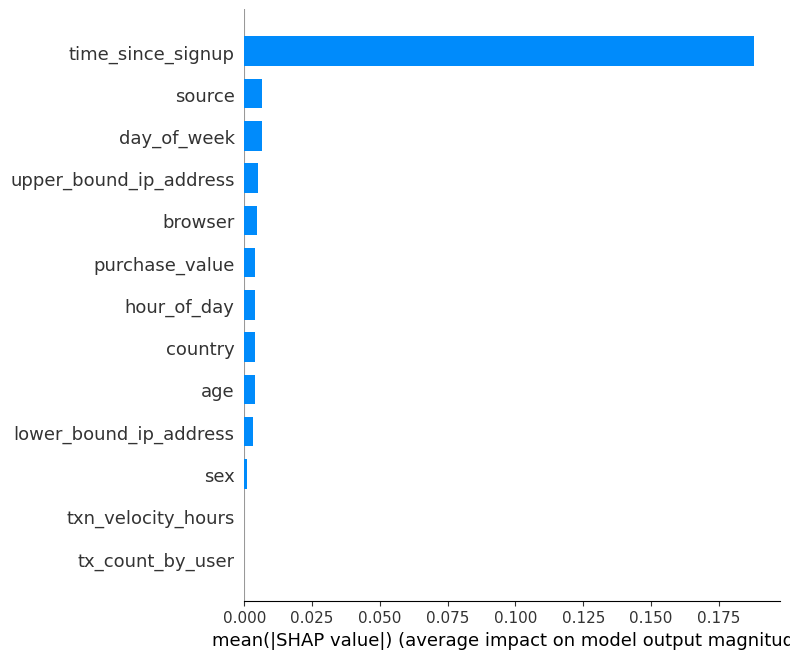

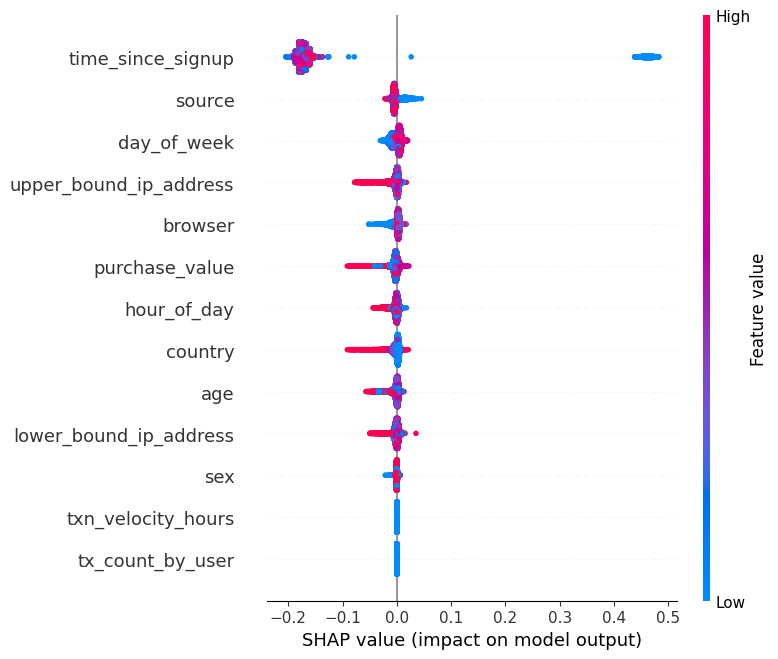

In [4]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
import os

os.makedirs('../data/SHAP', exist_ok=True)

# Load trained model and numerically encoded/scaled test data
model = load('../data/trained/random_forest_ecom.joblib')  # Use credit card model if needed
X_test = pd.read_csv('../data/SHAP/X_ecom_test_scaled.csv')  # Use credit card test set if needed

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Global Feature Importance: Summary Plot (Bar)
plt.figure()
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=False)
plt.savefig("../data/SHAP/shap_summary_bar.png")
plt.show()

# Global Feature Importance: Summary Plot (Dot)
plt.figure()
shap.summary_plot(shap_values[1], X_test, show=False)
plt.savefig("../data/SHAP/shap_summary_dot.png")
plt.show()

# Local Explanation: Force Plot for a single prediction
shap.initjs()
sample_idx = 0  
force_plot = shap.force_plot(
    explainer.expected_value[1], 
    shap_values[1][sample_idx], 
    X_test.iloc[sample_idx]
)
shap.save_html("../data/SHAP/shap_force_plot.html", force_plot)
force_plot